In [1]:
# I need to tell python where my libaraies
# are (you probably don't need this)
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages')

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid",
              {'grid.linestyle': '--', 'grid.color': '0.9', 'axes.edgecolor': '0.3'})
sns.set_context("poster")
from PIL import Image

## Finding patterns with machine learning - classification

The aim today will be to find $y$ labels based on knowing features $\mathbf{x}$.

In [2]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

### `sklearn` 2D logistic regression: height/weight as predictors of gender

In [3]:
dflog = pd.read_csv("Lab5_content/data/01_heights_weights_genders.csv")
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


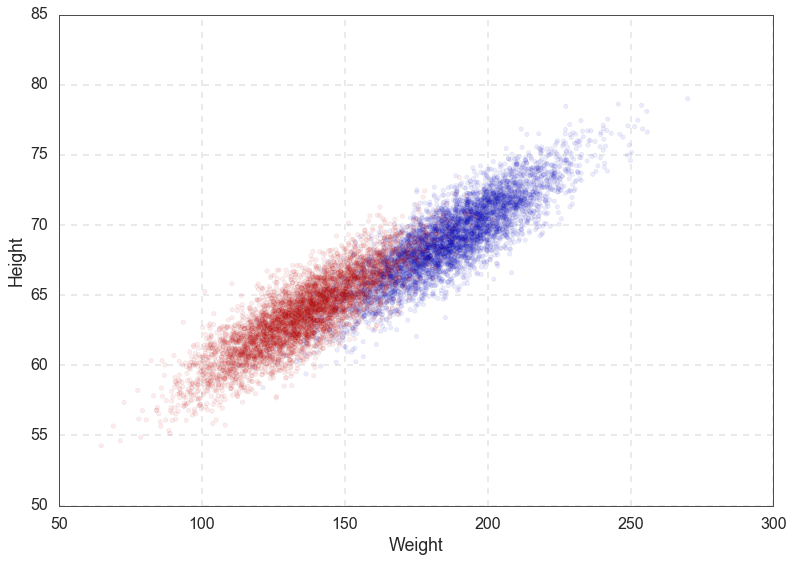

In [8]:
plt.scatter(dflog.Weight, dflog.Height, c=[cm_bright.colors[i] for i in dflog.Gender=="Male"], alpha=0.08)
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    # split data into train/test groups, 5 times
    for train, test in KFold(y.size, nfold):
        # fit
        clf.fit(x[train], y[train])
        # evaluate score function on held-out data
        result += score_func(clf.predict(x[test]), y[test])
    return result / nfold # average

##### Test cells:

In [24]:
for train, test in KFold((dflog.Gender == 'Male').size, n_folds=3):
    print(train)
    print(train.size)
    print('')
    print(test)
    print(test.size)
    print('')
    print('')

[3334 3335 3336 ..., 9997 9998 9999]
6666

[   0    1    2 ..., 3331 3332 3333]
3334


[   0    1    2 ..., 9997 9998 9999]
6667

[3334 3335 3336 ..., 6664 6665 6666]
3333


[   0    1    2 ..., 6664 6665 6666]
6667

[6667 6668 6669 ..., 9997 9998 9999]
3333




In [13]:
print(len(dflog.Gender))
print(dflog.Gender.size)
print(dflog[['Height','Weight']].values)
dflog[['Height','Weight']].head()

10000
10000
[[  73.84701702  241.89356318]
 [  68.78190405  162.31047252]
 [  74.11010539  212.74085556]
 ..., 
 [  63.86799221  128.47531878]
 [  69.03424313  163.85246135]
 [  61.94424588  113.64910268]]


,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


##### Done test cells

In [17]:
from sklearn.cross_validation import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, (dflog.Gender=="Male").values)
print('Features:')
print(Xlr)
print('Male(true) / Female(false)')
print(ylr)

[[  63.26327461  137.36490253]
 [  70.38920071  178.85134834]
 [  64.31632835  135.15422074]
 ..., 
 [  65.10205207  156.65845967]
 [  69.56129654  199.49433579]
 [  64.47560158  137.9647047 ]]
[False  True False ...,  True  True False]


In [27]:
# the grid of parameters to search over
Cs = [0.0001, 0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
max_score = 0

# C : float, optional (default=1.0)
#     Inverse of regularization strength; must be a positive float.
#     Like in support vector machines, smaller values specify stronger
#     regularization.
for C in Cs:
    clf = LogisticRegression(C=C)
    score = cv_score(clf, Xlr, ylr)
    print(score, C)
    if score > max_score:
        max_score = score
        best_C = C
print('Best score:')
print(max_score, best_C)

0.916666666667 0.0001
0.918133333333 0.001
0.917733333333 0.1
0.917733333333 1
0.917733333333 10
0.917733333333 100
Best score:
0.918133333333 0.001


Instead of using a loop, we can do a "GridSearch" to compare parameters for a given model

In [28]:
from sklearn.grid_search import GridSearchCV
clfl2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [30]:
fitmodel.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
fitmodel.best_params_

{'C': 0.001}

In [32]:
fitmodel.best_score_

0.91786666666666672

In [33]:
fitmodel.grid_scores_

[mean: 0.91640, std: 0.00707, params: {'C': 0.0001},
 mean: 0.91787, std: 0.00754, params: {'C': 0.001},
 mean: 0.91760, std: 0.00744, params: {'C': 0.1},
 mean: 0.91760, std: 0.00744, params: {'C': 1},
 mean: 0.91760, std: 0.00744, params: {'C': 10},
 mean: 0.91760, std: 0.00744, params: {'C': 100}]

In [34]:
clfl2 = LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(Xlr, ylr)
ypred2 = clfl2.predict(Xtestlr)
accuracy_score(ypred2, ytestlr)

0.92359999999999998

This regression was done using a squared error loss function and Empirical Risk Minimization (ERM).

#### Error measures

Let's think about how many samples are classified correctly. The *risk* is defined as

$$ R(h(x)) = \frac{1}{N}\sum_y{l}, $$

where $h(x)$ are the vector set of predictions and $l$ is the loss function. It can have the form

$$ l = 1_{h\neq y}, $$

where the penalty for $h\neq y$ is one. For the regression we used $l = (h-y)^2$.

The *accuracy score* or *utility* is given by

$$ U(h(x)) = \frac{1}{N}\sum_y{1_{h=y}}. $$

### Image recognition - ATM camera example
Imagine that you are tasked whith making a smart ATM camera which can distinguish between dollar notes and checks.

You are given a set of 87 images of checks and dollars, each of which have been scaled to 322 X 137 pixels, and where each pixel has 3 color channels.

In [49]:
data = np.load('Lab5_content/data/imag.pix.npy')
data

array([[238, 238, 238, ..., 238, 238, 238],
       [140, 150, 152, ..., 255, 255, 255],
       [253, 253, 253, ..., 255, 255, 255],
       ..., 
       [241, 243, 242, ..., 179, 173, 125],
       [255, 255, 221, ..., 255, 255, 243],
       [222, 207, 186, ..., 210, 199, 181]], dtype=int64)

In [50]:
y = np.load('Lab5_content/data/imag.lbl.npy')
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
# Image sizes in pixels
STANDARD_SIZE = (322, 137)
print(STANDARD_SIZE[0]*STANDARD_SIZE[1]*3)
data.shape, y.shape

132342


((87, 132342), (87,))

In [83]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r, g, b = mat[0:size:3], mat[1:size:3], mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

In [74]:
def display_pic(mat):
    with sns.axes_style('white'):
        plt.imshow(get_image(mat))

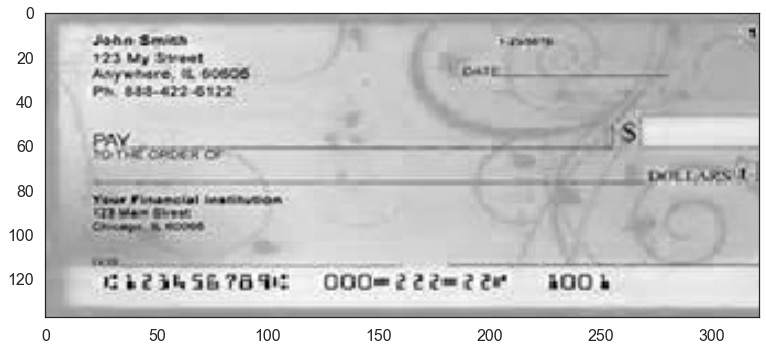

In [85]:
display_pic(data[20])

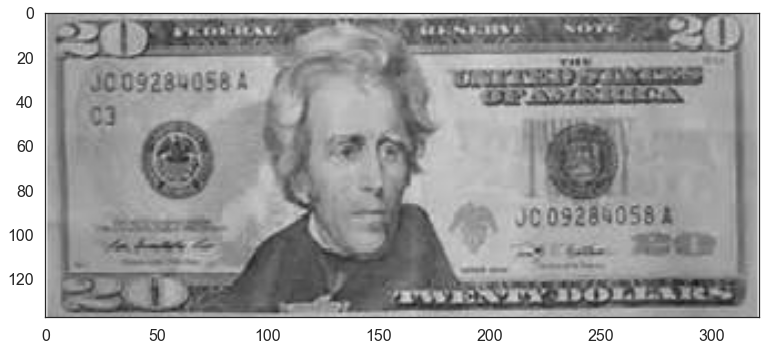

In [87]:
display_pic(data[49])

#### Feature engineering to differentiate images
We have 322 x 137 x 3 pixels (features) to work with. This is too many and will lead to overfitting.

Another way to look at this problem is the following: we have 85 data points, but 136452 features; that is, way more features than data points. Thus there is a high chance that a few attributes will correlate with the prediction variable coincidentally. (Having lots of images, or "big-data" helps in combatting overfitting!)

We will engage in some a-priori feature selection that will reduce the dimensionality of the problem. The idea we'll use here is something called Principal Components Analysis, or PCA.

PCA is an unsupervized learning technique. The basic idea behind PCA is to rotate the co-ordinate axes of the feature space. We first find the direction in which the data varies the most. We set up one co-ordinate axes along this direction, which is called the first principal component. We then look for a perpendicular direction in which the data varies the second most. This is the second principal component. The diagram illustrates this process. There are as many principal components as the feature dimension: all we have done is a rotation.

![](http://i.stack.imgur.com/Q7HIP.gif)

We decide on a threshold of variation and once the variation in a particular direction falls below a certain number, we get rid of all the co-ordinate axes after that principal component.

For example, if the variation falls below 10% after the third axes, and we decide that 10% is an acceptable cutoff, we remove all dimensions from the fourth dimension onwards. In other words, we took our higher dimensional problem and projected it onto a 3 dimensional subspace.

This is based on the assumption that the dataset, in either its unsupervized form ${x}$, or their supervized form ${y,x}$, lives on a lower dimensional subspace. If we can find this subspace, we can then hope to find a method which respectively separates or fits the data.

Here we'll continue to focus on PCA. We'll reduce our dimensionality from 136452 to 60. We choose 60 as a large apriori number: we dont know if the variation in the data will have gone below a reasonable threshold by then. Notice that we use `fit_transform` in the sklearn API which takes the original 87 rows x 136452 columns dimensional data data and transforms it to a 87 x 60 data matrix X.

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
pca

PCA(copy=True, n_components=60, whiten=False)

In [104]:
X = pca.fit_transform(data)
X.shape

(87, 60)

In [105]:
len(pca.explained_variance_ratio_)

60

In [97]:
print(pca.explained_variance_ratio_*100)
print('')
print(sum(pca.explained_variance_ratio_))

[ 35.92596698   6.29318801   4.10778347   3.11950952   2.81695972
   2.28831619   2.10127949   1.87404975   1.73264637   1.53023773
   1.42159671   1.318394     1.24701539   1.16381841   1.09958324
   1.06073157   1.00743046   0.98023869   0.96055948   0.91535856
   0.90185612   0.85213309   0.8367458    0.79692356   0.75489846
   0.72505562   0.70821781   0.6796765    0.66092535   0.64772084
   0.62739233   0.59477344   0.58303101   0.57450926   0.57278186
   0.55261734   0.53858717   0.53343191   0.51665709   0.49343182
   0.48594565   0.47762236   0.47284194   0.45620017   0.44417076
   0.44004494   0.4346039    0.42800383   0.42195733   0.4100348
   0.40554006   0.39424777   0.38943727   0.38311261   0.37925514
   0.36341299   0.36062508   0.3497255    0.34022686   0.33491379]

0.942879528617


The explained variance ratio pca.explained_variance_ratio_ tells us how much of the variation in the features is explained by these 60 features. When we sum it up over the features, we see that 94% is explained: good enough to go down to a 60 dimensional space from a 136452 dimensional one!

The individual variances (shown above) increase as we increase the dimensionality. The first dimension accounts for 35% of the variation, the second 6%, and it goes steadily down from there.

Let us create a dataframe with these 60 features labelled pc1,pc2...,pc60 and the labels of the sample:

In [108]:
df = pd.DataFrame({'y':y, 'label': np.where(y==1, 'check', 'dollar')})
df.head()

,label,y
0,check,1
1,check,1
2,check,1
3,check,1
4,check,1


In [109]:
for i in range(pca.explained_variance_ratio_.shape[0]):
    df['pc{}'.format(i+1)] = X[:,i]
df.head()

,label,y,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
0,check,1,-22536.362571,2428.343967,2133.777242,-328.322450,1065.239885,-79.779510,425.028862,-622.482412,2490.207981,858.586365,-1072.565326,277.135956,-1117.008245,712.921050,-787.542306,414.930152,-195.835369,472.439595,-429.687952,609.645649,-588.997035,-266.805059,987.770869,-953.085804,1037.093164,-568.689960,-42.940841,-112.654017,520.389800,545.386992,-643.325633,-77.820997,-733.674370,1263.879103,586.756998,119.593373,-508.370089,-294.174840,-252.519347,-51.538313,-457.830940,758.886057,515.916103,440.076107,-463.097417,-225.847169,-72.615736,-280.709429,-588.030969,-448.784198,539.070474,173.421252,379.865134,160.692953,157.257050,450.314126,-227.221397,-112.364944,-186.038429,-68.330989
1,check,1,-22226.658684,709.255778,288.826225,-1300.635376,792.084752,-217.442930,-1076.777444,2115.106737,875.462523,1124.846524,-343.234147,-43.368372,547.937212,357.548885,-1761.499582,-372.120164,813.766003,293.993188,-941.050102,-154.191592,-1122.863363,507.700410,815.875978,-717.999469,289.149370,115.870070,816.665466,1144.817760,359.342436,120.101878,-851.744626,-582.296067,316.394094,176.118549,673.219112,657.451216,94.661336,192.333834,-142.834165,376.042041,120.771967,20.335283,697.047946,-22.197777,-299.883777,22.574739,-26.094463,-290.112096,1147.013054,318.365764,426.590209,-81.492381,218.911740,-293.833368,-574.800385,461.005213,-133.873301,86.549876,-68.253606,194.165434
2,check,1,-17364.260784,4252.027148,-793.802239,-1362.054543,374.230509,-3142.098137,-2514.239438,-1443.845989,121.012593,419.751003,-2083.156756,1717.655662,-723.242074,-1240.426110,-310.766668,-1059.408079,1385.595045,-799.959051,-2598.756819,880.676052,3384.434883,-389.628097,3414.296511,-1340.080791,-4755.217740,-1036.255043,2198.383527,-687.340263,-1379.299146,-2148.507251,-644.565929,-1683.784601,1774.957382,-3132.874465,861.445428,-2247.593057,3105.529724,-3040.391807,843.107937,-277.652726,1718.531906,-3134.639051,3721.305222,-1470.315986,-997.252433,665.795034,-629.128117,1304.004522,-113.079572,-2860.852264,2535.136052,-1801.134606,1147.956100,1897.679487,1262.972669,2524.590385,621.040293,-422.350399,-1367.147366,-822.139175
3,check,1,-22847.256199,900.591903,-577.203148,-180.315540,733.144739,107.929873,-1441.787045,1069.822194,-844.816567,1390.008267,1470.750252,-723.940456,-578.786597,-259.303433,932.522873,170.963935,-301.561034,871.589461,-180.217083,-1238.130123,557.669686,-174.747087,332.949651,370.770361,-934.637134,-180.894557,1318.174882,92.860081,273.711601,-464.485412,-167.088608,70.342765,101.594998,834.492608,195.240356,-635.616322,-394.941809,-336.312866,130.697946,352.956334,1431.120380,-790.615542,-977.419373,-580.005826,-414.524329,-520.226448,-706.248906,327.599586,-888.099678,-1645.789093,-91.398011,0.090413,66.658666,353.418805,82.527303,-737.466496,-662.261573,-535.062574,537.059324,-528.666270
4,check,1,-15868.672595,-3259.491423,-506.800796,-919.635265,-2166.553649,981.628130,1669.697325,391.328228,-1735.708244,-163.565703,-1626.848455,-556.071285,-863.023076,1721.533650,944.390131,-1133.831269,2139.645031,766.969676,-1093.378106,-602.035479,-28.726067,83.689740,505.980050,-1106.373987,332.008248,1227.814307,-708.139610,-713.030110,142.707832,-912.989078,1012.271645,3623.483860,2107.208639,-3363.795948,966.429469,2141.451996,-1849.211068,-2139.553978,2546.960143,472.873126,135.062864,1404.581160,1283.016300,1311.779794,269.914003,-960.813470,322.601451,-850.742712,3154.415688,1425.425648,946.439659,-2233.105652,109.845355,213.800180,-3525.269984,-2516.479764,722.617389,-1742.192699,-2282.672192,1720.499388


Lets see what these principal components look like:

In [128]:
pca.components_.shape

(60, 132342)

In [116]:
def normit(a):
    a = (a - a.min())/(a.max() - a.min())
    a = a*256
    return np.round(a)

def getNC(pc, j):
    size = 322*137*3
    r = pc.components_[j][0:size:3]
    g = pc.components_[j][1:size:3]
    b = pc.components_[j][2:size:3]
    r = normit(r)
    g = normit(g)
    b = normit(b)
    return r, g, b

def display_component(pc, j):
    r, g, b = getNC(pc, j)
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')
    rgbArray[..., 0] = r.reshape(137, 322)
    rgbArray[..., 1] = g.reshape(137, 322)
    rgbArray[..., 2] = b.reshape(137, 322)
    plt.imshow(rgbArray)
    plt.xticks([]); plt.yticks([])

Printing the PCA reduction for increasing dimensions.

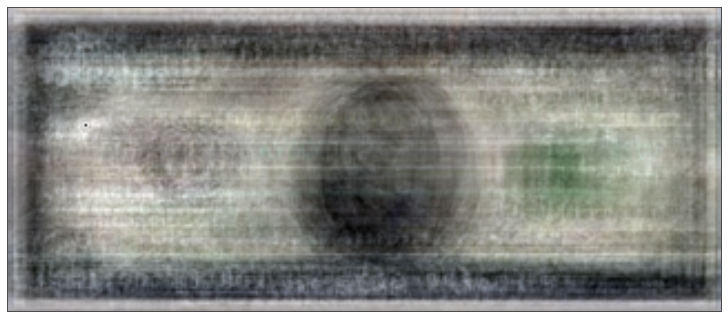

In [134]:
# First principle component
display_component(pca, 0)

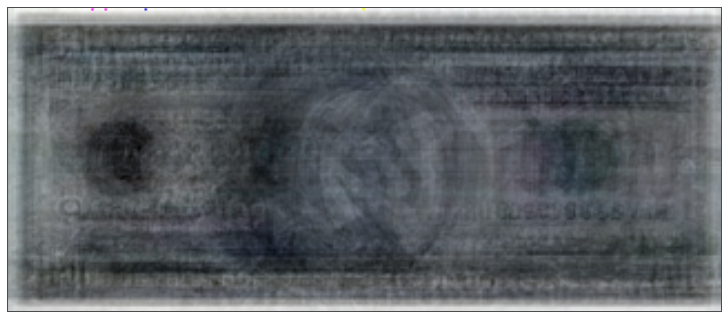

In [136]:
# Second principle component
display_component(pca, 1)


We take the first two principal components and immediately notice in the diagram below that they are enough to separate out the checks and the dollars. Indeed the first component itself seems to be mostly enough. We can look at the image of the first component and speculate that the medallion in the middle of the dollars probably contributes to this.

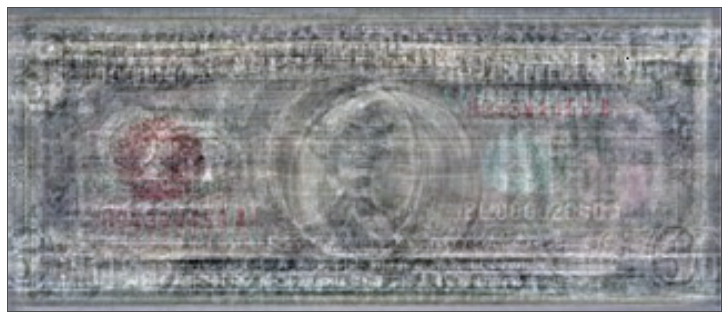

In [135]:
display_component(pca, 29)

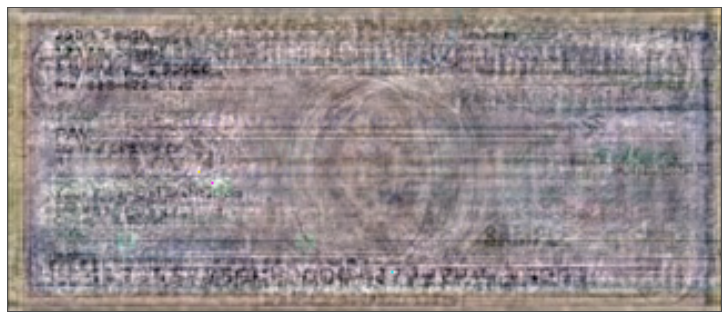

In [133]:
display_component(pca, 59)

In [137]:
df.head()

,label,y,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
0,check,1,-22536.362571,2428.343967,2133.777242,-328.322450,1065.239885,-79.779510,425.028862,-622.482412,2490.207981,858.586365,-1072.565326,277.135956,-1117.008245,712.921050,-787.542306,414.930152,-195.835369,472.439595,-429.687952,609.645649,-588.997035,-266.805059,987.770869,-953.085804,1037.093164,-568.689960,-42.940841,-112.654017,520.389800,545.386992,-643.325633,-77.820997,-733.674370,1263.879103,586.756998,119.593373,-508.370089,-294.174840,-252.519347,-51.538313,-457.830940,758.886057,515.916103,440.076107,-463.097417,-225.847169,-72.615736,-280.709429,-588.030969,-448.784198,539.070474,173.421252,379.865134,160.692953,157.257050,450.314126,-227.221397,-112.364944,-186.038429,-68.330989
1,check,1,-22226.658684,709.255778,288.826225,-1300.635376,792.084752,-217.442930,-1076.777444,2115.106737,875.462523,1124.846524,-343.234147,-43.368372,547.937212,357.548885,-1761.499582,-372.120164,813.766003,293.993188,-941.050102,-154.191592,-1122.863363,507.700410,815.875978,-717.999469,289.149370,115.870070,816.665466,1144.817760,359.342436,120.101878,-851.744626,-582.296067,316.394094,176.118549,673.219112,657.451216,94.661336,192.333834,-142.834165,376.042041,120.771967,20.335283,697.047946,-22.197777,-299.883777,22.574739,-26.094463,-290.112096,1147.013054,318.365764,426.590209,-81.492381,218.911740,-293.833368,-574.800385,461.005213,-133.873301,86.549876,-68.253606,194.165434
2,check,1,-17364.260784,4252.027148,-793.802239,-1362.054543,374.230509,-3142.098137,-2514.239438,-1443.845989,121.012593,419.751003,-2083.156756,1717.655662,-723.242074,-1240.426110,-310.766668,-1059.408079,1385.595045,-799.959051,-2598.756819,880.676052,3384.434883,-389.628097,3414.296511,-1340.080791,-4755.217740,-1036.255043,2198.383527,-687.340263,-1379.299146,-2148.507251,-644.565929,-1683.784601,1774.957382,-3132.874465,861.445428,-2247.593057,3105.529724,-3040.391807,843.107937,-277.652726,1718.531906,-3134.639051,3721.305222,-1470.315986,-997.252433,665.795034,-629.128117,1304.004522,-113.079572,-2860.852264,2535.136052,-1801.134606,1147.956100,1897.679487,1262.972669,2524.590385,621.040293,-422.350399,-1367.147366,-822.139175
3,check,1,-22847.256199,900.591903,-577.203148,-180.315540,733.144739,107.929873,-1441.787045,1069.822194,-844.816567,1390.008267,1470.750252,-723.940456,-578.786597,-259.303433,932.522873,170.963935,-301.561034,871.589461,-180.217083,-1238.130123,557.669686,-174.747087,332.949651,370.770361,-934.637134,-180.894557,1318.174882,92.860081,273.711601,-464.485412,-167.088608,70.342765,101.594998,834.492608,195.240356,-635.616322,-394.941809,-336.312866,130.697946,352.956334,1431.120380,-790.615542,-977.419373,-580.005826,-414.524329,-520.226448,-706.248906,327.599586,-888.099678,-1645.789093,-91.398011,0.090413,66.658666,353.418805,82.527303,-737.466496,-662.261573,-535.062574,537.059324,-528.666270
4,check,1,-15868.672595,-3259.491423,-506.800796,-919.635265,-2166.553649,981.628130,1669.697325,391.328228,-1735.708244,-163.565703,-1626.848455,-556.071285,-863.023076,1721.533650,944.390131,-1133.831269,2139.645031,766.969676,-1093.378106,-602.035479,-28.726067,83.689740,505.980050,-1106.373987,332.008248,1227.814307,-708.139610,-713.030110,142.707832,-912.989078,1012.271645,3623.483860,2107.208639,-3363.795948,966.429469,2141.451996,-1849.211068,-2139.553978,2546.960143,472.873126,135.062864,1404.581160,1283.016300,1311.779794,269.914003,-960.813470,322.601451,-850.742712,3154.415688,1425.425648,946.439659,-2233.105652,109.845355,213.800180,-3525.269984,-2516.479764,722.617389,-1742.192699,-2282.672192,1720.499388


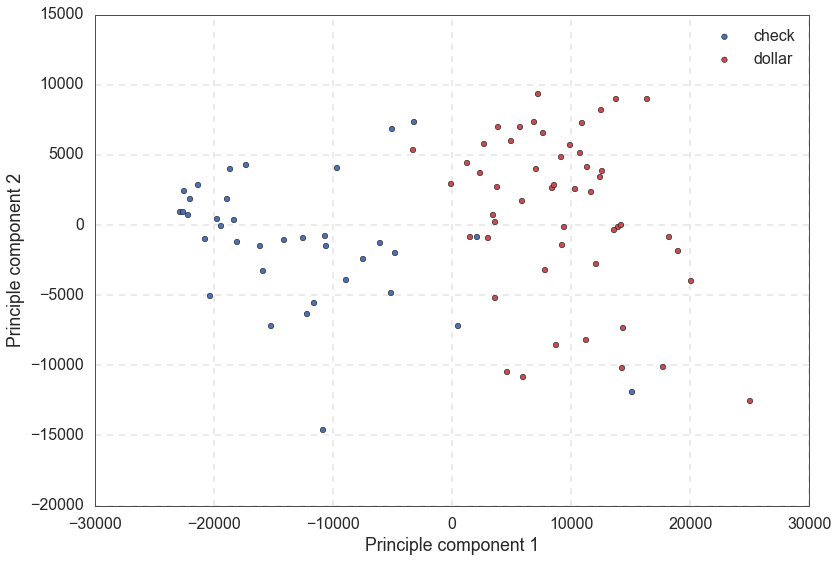

In [146]:
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'],
                c=color, label=label, s=30)
    plt.xlabel('Principle component 1')
    plt.ylabel('Principle component 2')
plt.legend()

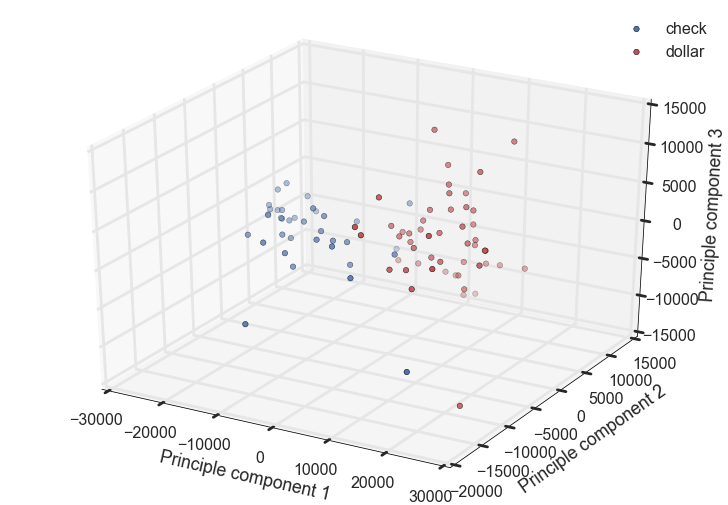

In [153]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    ax.scatter(df[mask]['pc1'], df[mask]['pc2'], df[mask]['pc3'],
                c=color, label=label, s=30)
    ax.set_xlabel('Principle component 1', labelpad=20)
    ax.set_ylabel('Principle component 2', labelpad=20)
    ax.set_zlabel('Principle component 3', labelpad=20)
plt.legend()

We needed to use 60 components to explain 94% of the variation in the features, but only 1 or 2 components to separate checks from dollars because PCA is unsupervised: the only variation we are explaining is the variation in the 136452 dimensional feature space. We are not explaining the variation in the the target y (the label), and it might turn out, as it does in this case, that with the additional information in y, the dimensionality needed for classification is much lower.

We could thus choose just the first few principal components to make our classifier. For the purposes of this lab, since two components can be easily visualized (even though adding some fore features may leads to better separability), we'll go with learning a 2-dimensional classifier in the pc1 and pc2 dimensions!

As an added bonus, I'll compare to the 3D classifier as we go.

By the way, there is a problem with pre-doing feature selection before doing cross-validation. Ideally one should be doing the feature selection separately in each fold. The reasons for this is basically that there is a high probability that a feature correlates strongly with y just by chance.

#### Using KNN for classification in reduced feature space

![](https://github.com/cs109/2015lab5/raw/8e8b3a48b4999417117b43532f9b0b7d62d3ea59/images/knn1.png)

The basic notion is this: if a lot of samples in some area of the feature space belong to one class as compared to the other, we'll label that part of the feature space as "belonging" to that class. This process will then classify the feature space into class-based regions. Then, given the point in feature space, we find which region its in and thus its class.

The way kNN does this is to ask for the k nearest neighbors in the training set of the new sample. To answer this question, one must define a distance in the feature space - typically defined as the Euclidean distance, the sum of the square of the difference of each feature value between any two samples.

$$ D(s_1, s_2) = \sum_f (x_{f_1}-x_{f_2})^2 $$

Once we have a distance measure, we can sort the distances from the current sample. Then we choose the k closest ones in the training set, where k is an odd number (to break ties) like 1,3,5,...19,. We now see how many of these k "nearest neighbors" belong to one class or the other, and choose the majority class amongst those neighbors as our sample's class.

The training process thus simply consists of memorizing the data, perhaps using a database to aid in the fast lookup of the k nearest training set neighbors of any point in feature space. Notice that this process divides feature space into regions of one class or the other, since one can simply ask what the k nearest neighbors in the training set are of any given point in feature space. Also notice that since classification happens via a majority "voting" scheme, we also know the probability that a point in feature space belongs to a class, as estimated by the fraction of k nearest neighbors to that point in the desired class.

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

ys = df['y'].astype(int).values
subdf = df[['pc1', 'pc2']]
subdfstd = (subdf - subdf.mean())/subdf.std()
Xs = subdfstd.values

In [180]:
def classify(X, y, nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = KNeighborsClassifier(nbrs)
    clf.fit(Xtrain, ytrain)
    # Use 'score' to extract accurace (requires test data)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall = np.concatenate((Xtrain, Xtest))
    if plotit:
        print('Accuracy on training data: {:0.2f}'.format(training_accuracy))
        print('Accuracy on test data:     {:0.2f}'.format(test_accuracy))
        plt.figure()
        ax = plt.gca()
        points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.2, psize=20)
    return nbrs, training_accuracy, test_accuracy

Lets see what happens when we choose k=1. On the training set, the 1NN classifier memorizes the training data. It will predict perfectly on the training set, and wont do too badly on the test set, especially deep in the regions of feature space where one or the other class dominates. This is because evem one neighbor might be enough in those regions. However, the same classifier will do badly near the clasification boundaries on the test set, because you will need more than one neighbor to decide with any certainty of the class.

Accuracy on training data: 1.00
Accuracy on test data:     0.91


(1, 1.0, 0.91428571428571426)

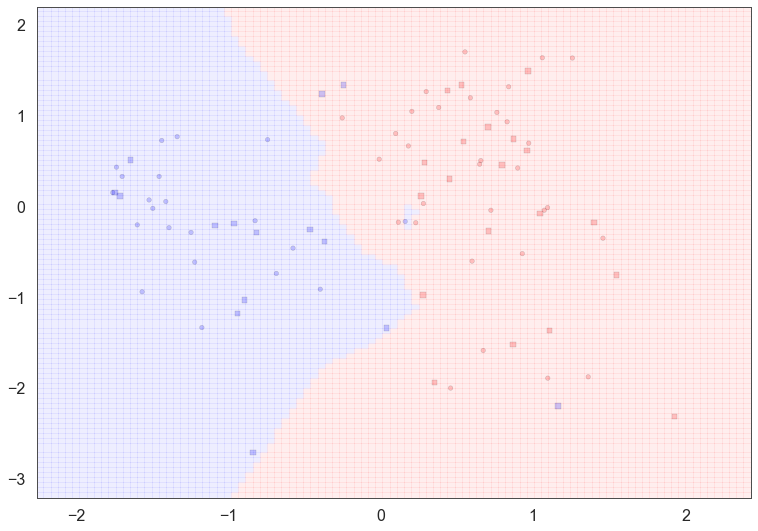

In [182]:
# Blue = check
# Red = dollar bill
classify(Xs,ys,1)

Since we are choosing just one neighbor, we fit to the noise in the region rather than the trend. We are overfitting.

If we choose too large a number for k, such as 50, we are wandering too far from our original sample,and thus we average over a large amount of the feature space. This leads to a very biased classification, depending on where our sample is, but extending far out from there. Our classification may even cover the entire feature space, then giving us the majority class.

Accuracy on training data: 0.58
Accuracy on test data:     0.60


(50, 0.57692307692307687, 0.59999999999999998)

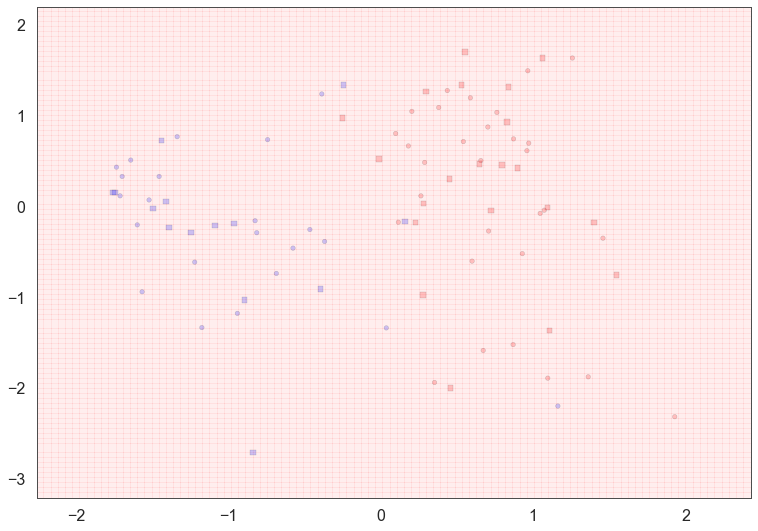

In [183]:
classify(Xs,ys,50)

![](https://github.com/cs109/2015lab5/raw/8e8b3a48b4999417117b43532f9b0b7d62d3ea59/images/knn2.png)
Overfitting and underfitting are illustrated in the image above: the small circles represent small k neighborhoods while the large circle indicates a large k neighborhood. 

The circle of in-between size illustrates what a reasonable k might do. Also notice that kNN will be quite stable far away from the classification bondary, but is likely to be more jagged near the classification boundary.

We thus once again need to find the balance between the high bias (large k) case and the high variance (low k) case, and use an error vs complexity curve to find the appropriate k.

#### Error VS complexity (k) and cross-validation

In [184]:
fits = {}
for k in np.arange(1, 45, 1):
    fits[k] = []
    for i in range(200):
        fits[k].append(classify(Xs, ys, k, plotit=False))
nbrs = np.arange(1, 45, 1)
fmeanstr = np.array([1 - np.mean([t[1] for t in fits[e]]) for e in nbrs])
fmeanste = np.array([1 - np.mean([t[2] for t in fits[e]]) for e in nbrs])
fstdsstr = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])
fstdsste = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])

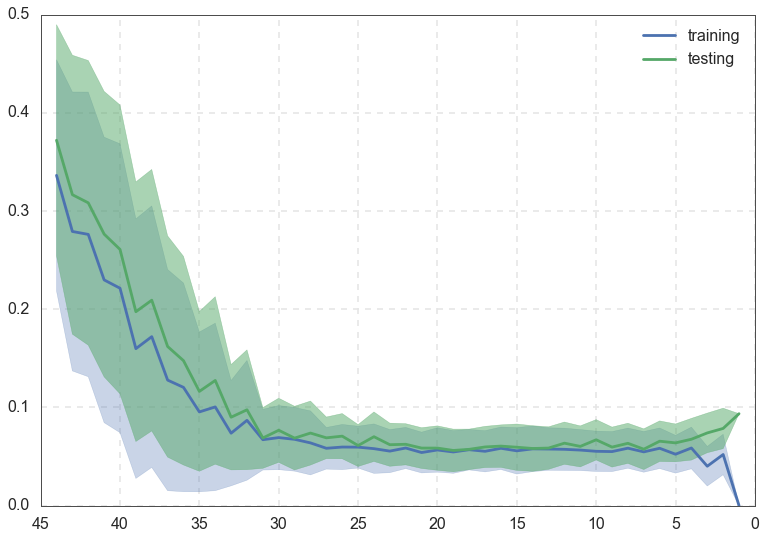

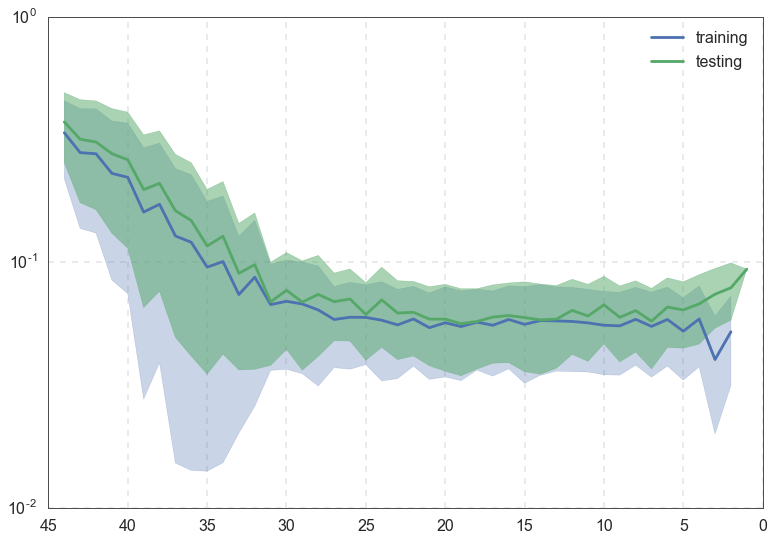

In [185]:
plt.gca().invert_xaxis()
plt.plot(nbrs, fmeanstr, color=c0, label="training");
plt.fill_between(nbrs, fmeanstr - fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.plot(nbrs, fmeanste, color=c1, label="testing");
plt.fill_between(nbrs, fmeanste - fstdsste, fmeanste+fstdsste, color=c1, alpha=0.5)
plt.legend()

plt.show()

plt.gca().invert_xaxis()
plt.semilogy(nbrs, fmeanstr, color=c0, label="training");
plt.fill_between(nbrs, fmeanstr - fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.semilogy(nbrs, fmeanste, color=c1, label="testing");
plt.fill_between(nbrs, fmeanste - fstdsste, fmeanste+fstdsste, color=c1, alpha=0.5)
plt.legend();

There is a large range of k from 25 to 5, in which the fit is as good as it gets!
 
#### Set-up code for classification using cross-validation

We first set up a function `cv_optimize` which takes a classifier clf, a grid of hyperparameters (such as a complexity parameter or regularization parameter as in the last ) implemented as a dictionary parameters, a training set (as a samples x features array) Xtrain, and a set of labels ytrain.

The code takes the traning set, splits it into `n_folds` parts, sets up `n_folds` folds, and carries out a cross-validation by splitting the training set into a training and validation section for each fold for us. It prints the best value of the parameters, and retuens the best classifier to us.

In [186]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print('Best params:', gs.best_params_)
    best = gs.best_estimator_
    return best

We then use this best classifier to fit the entire training set. This is done inside the do_classify function which takes a dataframe indf as input. It takes the columns in the list featurenames as the features used to train the classifier. The column targetname sets the target. The classification is done by setting those samples for which targetname has value target1val to the value 1, and all others to 0. We split the dataframe into 80% training and 20% testing by default, standardizing the dataset if desired. (Standardizing a data set involves scaling the data so that it has 0 mean and is described in units of its standard deviation. We then train the model on the training set using cross-validation. Having obtained the best classifier using cv_optimize, we retrain on the entire training set and calculate the training and testing accuracy, which we print. We return the split data and the trained classifier.

In [190]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf = indf[featurenames]
    if standardize:
        subdfstd = (subdf - subdf.mean())/subdf.std()
    else:
        subdfstd = subdf
    X = subdfstd.values
    y = (indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf = clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print('Accuracy on training data: {:0.2f}'.format(training_accuracy))
    print('Accuracy on test data:     {:0.2f}'.format(test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

Lets carry out another cross-validation

In [191]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(KNeighborsClassifier(),
                                                   {"n_neighbors": list(range(1,40,2))},
                                                   df, ['pc1','pc2'],
                                                   'label',
                                                   'check' )

Best params: {'n_neighbors': 3}
Accuracy on training data: 0.97
Accuracy on test data:     0.89


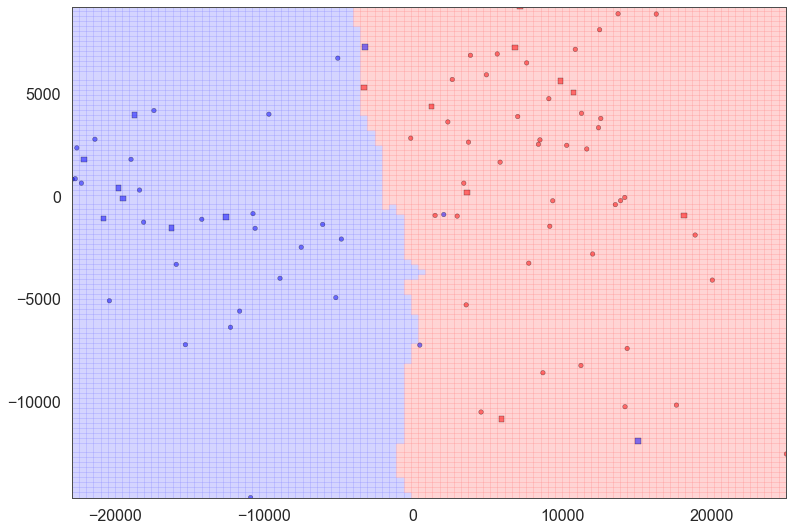

In [192]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

Plot the probability distribution using `clf.predict_proba` for meshgrid.

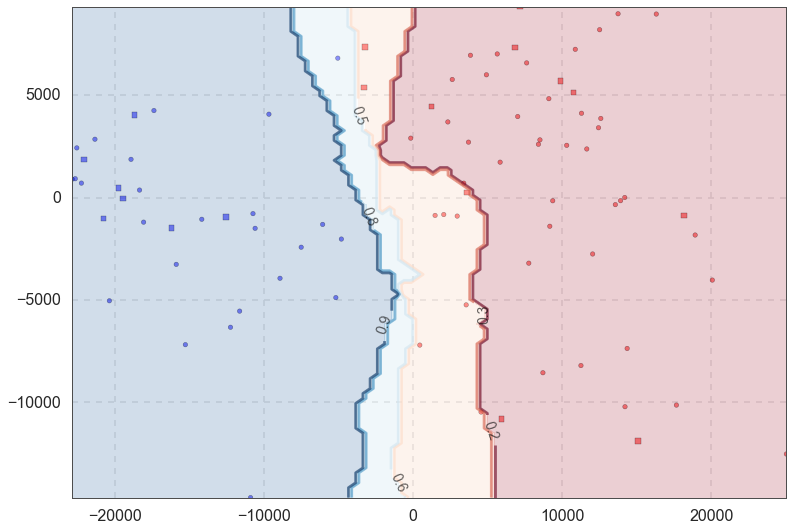

In [193]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

In [195]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, bestcv.predict(Xtest))

array([[9, 0],
       [2, 7]])

In [198]:
print(classification_report(ytest, bestcv.predict(Xtest)))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90         9
          1       1.00      0.78      0.88         9

avg / total       0.91      0.89      0.89        18



Nearest neighbour algorithms are used by big companies inculding Amazon, Netfix, and Yelp.

A critical part of writing such classifiers is finding the right features, since irrelevant features simply add additional noise into the distances in feature space. This is a particular form of the curse of dimensionality. Another way to deal with this problem is to assign greater weights to distances in certain dimensions.

Finally one may modify the voting mechanism or probability estimation for classifying from a simple majority class mechanism to one in which nearer examples in the k nearest examples are given more weight.

### Logistic regression

Remember the 1-0 loss function we talked about earlier: $l=1_{h\neq y}$. It turns out that minimizing the 1-0 loss with respect to some parameters of our model is very hard to do, for technical reasons of the 1-0 loss not being a convex loss. Thus it makes sense tolook for alternate approaches. One approach that we know about already is linear regression.

We could approach classification as linear regression, there the class, 0 or 1, is the target variable y. But this ignores the fact that our output y is discrete valued, and futhermore, the y predicted by linear regression will in general take on values less than 0 and greater than 1. Thus this does not seem like a very good idea.

[But what if we could change the form of our hypotheses $h(x)$ (predicted values) instead? i.e., Make it non-binary?? I don't understand what they are getting at.]

The idea behind logistic regression is very simple. We want to draw a line in feature space that divides the '1' samples from the '0' samples, just like in the diagram above. In other words, we wish to find the "regression" line which divides the samples. Now, a straight line has the form

$$w_1x_1+w_2x_2+w_0=0$$

in 2-dimensions. On one side of this line we have

$$w_1x_1+w_2x_2+w_0\geq 0,$$

and on the other:

$$w_1x_1+w_2x_2+w_0\lt 0.$$

Our classification rule then becomes

$$ y=1 \text{ if } \mathbf{w}\cdot \mathbf{x} \geq 0 $$
$$ y=0 \text{ if } \mathbf{w}\cdot \mathbf{x} \lt 0 $$

where $\mathbf{x}$ is the vector $\{1, x_1, x_2, ...\}$. What hypothesis $h(\mathbf{x})$ can we use to achieve this? One way is to use the sigmoid function:

$$ h(z) = \frac{1}{1+e^{-z}}. $$

Notice that at $z=0$ this function has the value 0.5.

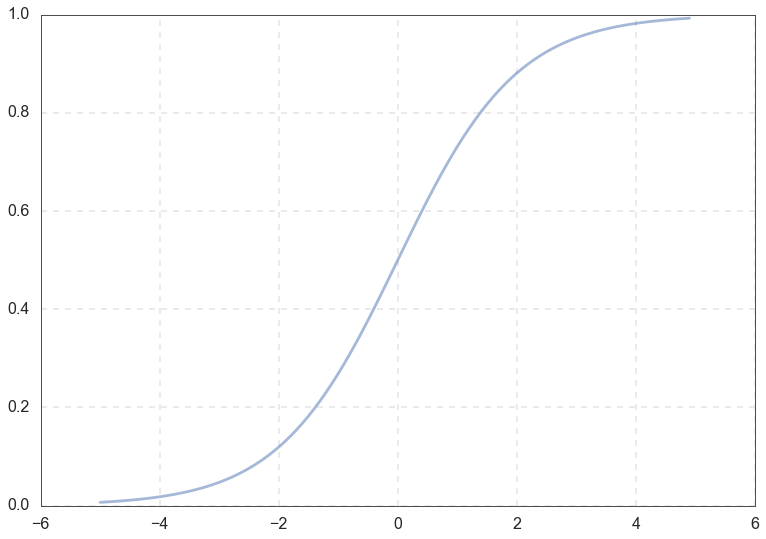

In [199]:
h = lambda z: 1./(1+np.exp(-z))
zs = np.arange(-5,5,0.1)
plt.plot(zs, h(zs), alpha=0.5);

So we then come up with our rule by identifying:

$$ z=\mathbf{w}\cdot \mathbf{x}, $$

then $h(\mathbf{w}\cdot\mathbf{x})\geq 0.5$ if $\mathbf{w}\cdot\mathbf{x}\geq 0$ and vice-versa. We have:

$$ y=1 \text{ if } h(\mathbf{w}\cdot\mathbf{x})\geq 0.5 $$
$$ y=0 \text{ if } h(\mathbf{w}\cdot\mathbf{x})\lt 0.5. $$

We will show soon that this identification can be achieved by minimizing a loss in the ERM framework called the **log loss**:

$$ R_D(\mathbf{w}) = -\sum_{y}\Big[y_i \log(h(\mathbf{w}\cdot\mathbf{x})) + (1-y_i)\log(1-h(\mathbf{w}\cdot\mathbf{x}))\Big] $$

More generally we add a regularization term (as in the ridge regression):

$$ R_D(\mathbf{w}) = -\sum_{y}\Big[y_i \log(h(\mathbf{w}\cdot\mathbf{x})) + (1-y_i)\log(1-h(\mathbf{w}\cdot\mathbf{x}))\Big] + \frac{1}{C}\mathbf{w}\cdot\mathbf{w} $$

where C is the regularization strength (corresponding to 1/α from the Ridge case), and smaller values of C mean stronger regularization. As before, the regularization tries to prevent features from having terribly high weights, thus implementing a form of feature selection.

How did we come up with this loss? We'll come back to that but lets first see how logistic regression works out.

In [200]:
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [208]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(),
                                                           {"C": [0.01, 0.1, 1, 10, 100]},
                                                           dflog,
                                                           ['Weight', 'Height'],
                                                           'Gender',
                                                           'Male')

Best params: {'C': 0.01}
Accuracy on training data: 0.92
Accuracy on test data:     0.92


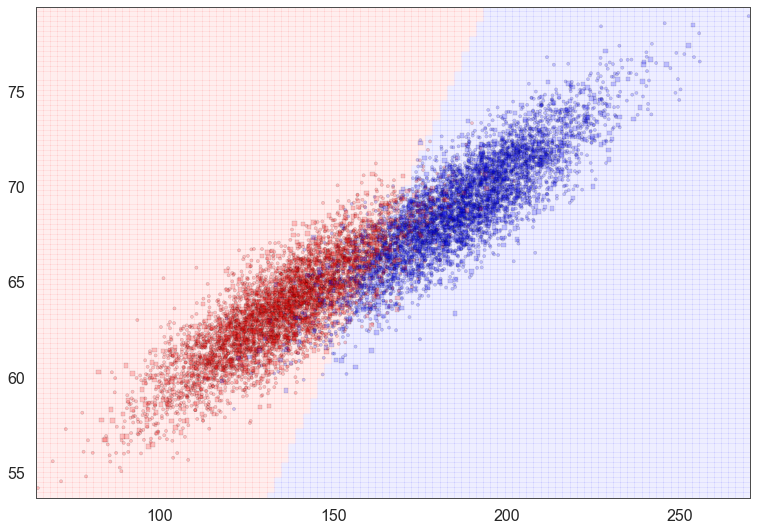

In [202]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, alpha=0.2);

In the figure here showing the results of the logistic regression, we plot the actual labels of both the training (circles) and test (squares) samples. The 0's (females) are plotted in red, the 1's (males) in blue. We also show the classification boundary, a line (to the resolution of a grid square). Every sample on the red background side of the line will be classified female, and every sample on the blue side, male. Notice that most of the samples are classified well, but there are misclassified people on both sides, as evidenced by leakage of dots or squares of one color ontothe side of the other color. Both test and traing accuracy are about 92%.

#### The probabilistic interpretaion

We said earlier that if $h>0.5$ we ought to identify the sample with $y=1$. One way of thinking about this is to identify $h(\mathbf{w}\cdot\mathbf{x})$ with the probability that the sample is 1. We will sample as 1 if we find that the probability of being a 1 is $\geq 0.5$. [?? what?]

So suppose we say that the probability of $y=1$ for a given $mathbf{x}$ is given by $h(\mathbf{w}\cdot\mathbf{x}).$ Then we have the conditional probabilities

$$ P(y=1~|~\mathbf{x}) = h(\mathbf{w}\cdot\mathbf{x}) $$
$$ P(y=0~|~\mathbf{x}) = 1-h(\mathbf{w}\cdot\mathbf{x}) $$

Or written together:

$$ P(y~|~\mathbf{x, w}) = h(\mathbf{w}\cdot\mathbf{x})^y(1-h(\mathbf{w}\cdot\mathbf{x}))^{(1-y)} $$

Iterating over the samples we get the probability of training $y$ given $\mathbf{w}$ and $\mathbf{x}$:

$$ P(y~|~\mathbf{x, w}) = P(\{y_i\}~|~\{\mathbf{x}_i\}, \mathbf{w}) = \prod_{y_i}P(y_i~|~\mathbf{x_i, w}) = \prod_{y_i}h(\mathbf{w}\cdot \mathbf{x}_i)^{y_i}(1-h(\mathbf{w}\cdot\mathbf{x}))^{(1-y_i)} $$

A particular training set can be thought of as a draw from some "true" probability distribution.

#### Maximizing the probability of the training set

We want to now maximize the probability $P(y~|~\mathbf{x, w})$ of correctly predicting $y$ given $\mathbf{x}$ and $\mathbf{w}$ (i.e., maximize the chance that each point is correctly identified). While this is not exactly the same thing as maximizing the 1-0 training risk, it is a principled way of obtaining the highest probability classification. This process is called **maximum likelihood estimation** since we are maximizing the *likelihood of the training data y*:

$$ \mathcal{L} = P(y~|~\mathbf{x, w})$$.

Maximum likelihood is one of the corenerstone methods in statistics, and is used to estimate probabilities of data.

We can equivalently maximize

$$ \mathcal{l} = \log(P(y~|~\mathbf{x, w}))$$.

since the logarithm is a monotonic function (entirely nonincreasing or nondecreasing). This is known as maximizing the **log-likelihood**. This is equivalent to minimizing $-l$:

$$ R_D(h(x)) = -l = -\log{\mathcal{L}} = -\log(P(y~|~\mathbf{x, w})). $$

Thus:

$$ R_D(h(x)) = -\log\Big[\prod_{y_i}h(\mathbf{w}\cdot \mathbf{x}_i)^{y_i}(1-h(\mathbf{w}\cdot\mathbf{x}))^{(1-y_i)}\Big]\\
=-\sum_{y_i}\log\big( h(\mathbf{w}\cdot \mathbf{x}_i)^{y_i}(1-h(\mathbf{w}\cdot\mathbf{x}))^{(1-y_i)} \big)\\ =-\sum_{y_i}\Big[\log(h(\mathbf{w}\cdot \mathbf{x}_i)^{y_i})+\log(1-h(\mathbf{w}\cdot \mathbf{x}_i))^{(1-y_i)}\Big]\\ = \sum_{y_i}(y_i\log(h(\mathbf{w}\cdot \mathbf{x}_i))+(1-y_i)\log(1-h(\mathbf{w}\cdot \mathbf{x}_i))) $$

Note: **Probabilistic estimation using maximum likelihood is equivalent to Empiricial Risk Minimization using the negative log-likelihood**.

In [212]:
# Return the probabilities for our samples
clf_l.predict_proba(Xtest_l)

array([[ 0.60202282,  0.39797718],
       [ 0.98914274,  0.01085726],
       [ 0.04226088,  0.95773912],
       ..., 
       [ 0.01457388,  0.98542612],
       [ 0.01039185,  0.98960815],
       [ 0.08392945,  0.91607055]])

#### Discriminative classifier

Logistic regression is what is known as a discriminative classifier. Let us plot the probabilities obtained from predict_proba, overlayed on the samples with their true labels:

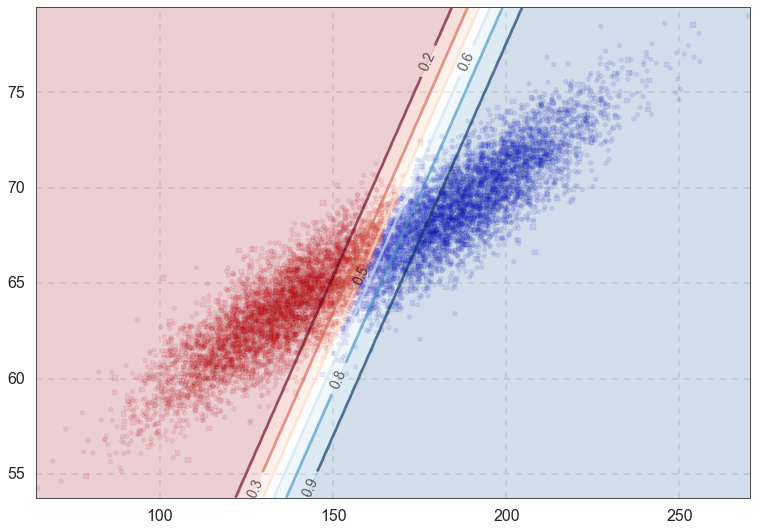

In [213]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=20, alpha=0.1);

Notice that lines of equal probability, as might be expected are stright lines. What the classifier does is very intuitive: if the probability is greater than 0.5, it classifies the sample as type '1' (male), otherwise it classifies the sample to be class '0'. Thus in the diagram above, where we have plotted predicted values rather than actual labels of samples, there is a clear demarcation at the 0.5 probability line.

This notion of trying to obtain the line or boundary of demarcation is what is called a discriminative classifier.

### The multiple risks in classification

With all this talk about probabilities, maximizing likelihood, and negative log-likelihoods as equivalent risks, you might be wondering if we have bitten the shark. Our original premise was a very simple empirical risk minimization (ERM). We just took all the points in the training or test set, and summed up the risk over them, dividing by the number of points in the set. Here we seem to be talking about solving a much harder problem, the estimation of probabilities.

We have some flavor of this simple minimization in this discriminative approach, since we do use ERM on the training set with the negatice log-likelihood as the risk. But we appear to have lost the direct notion of function estimation that we had proposed in the regression case. Instead we are indulging in probability estimation with a notion that a probability > 0.5 (in the two class case) is the key to making a classification.

Probability comes in because of stochastic noise and our incomplete knowledge about the world. Minimizing risk is an idea which works (as we saw in the noiseless regression case) even without any stochastic noise. Where do these two ideas meet?

We minimized a risk (maximised likelihood) to estimate probability in both Logistic Regression (log-loss) and LDA above. This risk is called the Estimation Risk. But there is a second risk lurking here: one we call the Decision Risk. The final result we desire is not a list of probabilities; but rather a decision-making process on how to classify a given sample. The decision risk converts these probabilities into classifications. For example, we make an intuitive decision to classify a sample as a '1' if the probability of the sample being a '1' is greater than 0.5. It turns out that this intution actually uses the 1-0 risk we introduced earlier as a decision risk, as we shall show in the next .

Why is separating the decision making process from the probability estimation process important? Consider as another example the case of predicting cancer based on features obtained from some tests, mammograms, etc. We dont want to predict a no-cancer for someone who has it (if we consider cancer as class '1', the positive class, this would be a false negative). This might be a death sentence (not to mention the liability lawsuit). The opposite, predicting cancer for someone who dosent have it (a false positive) is not as bad, obviously. Now the threshold probability for choosing '1' ought to be lower than 0.5, as we ought to be predicting "cancer" at even the whiff of it. This is asymmetric risk: we'll show in the next that we need to modify the 1-0 risk to account for this decision making asymmetry.

Thus we need to consider two risks in learning, one to estimate probabilities, and one to make decisions. We shall delve into this in more detail in the next lab.

### Discriminants: sometime there are no probabilities

Sometimes, however, in the learning process, there might be no probabilities. In this case, we want to directly find a decision boundary by using only a decision risk. Such a classifier which directly models a decision boundary is called a discriminant classifier, as opposed to a discriminative classifier. Examples are the Perceptron and the SVM.

Consider the example shown in the figure below. In the upper left panel, we have a line separating two classes of data. Notice, however, from the upper right panel that this line is not unique. Which one to choose?

Logistic Regression answers this question based on minimizing the log loss or modelling $P(\mathbf{x}~|~y)$ directly (we havent talked yet about how the latter is estimated, we shall come to this shortly). One other way to think about this, though, is to ask the question: what is the maximum margin around the lines that can be drawn. We ask this question in the bottom left panel, and see that one of the lines (not our original line) is the one that has a maximum margin around it, so that the margin just touches samples of either class.

This kind of classifier is called a maximum-margin classifier. There is no a-priori probabilistic interpretation of this model. Historically, it came directly out of empirical risk minimization (Vapnik, Vladimir. "Principles of risk minimization for learning theory." Advances in neural information processing systems. 1992., http://www.mit.edu/~6.454/www_spring_2001/emin/slt.pdf, Vapnik, Vladimir. The nature of statistical learning theory. Springer Science & Business Media, 2013.). The advantages of this model can be seen visually: a larger margin is more robust. Further, the model works where its needed the hardest: it is sensitive to the boundary between the classes, rather than the points samples deep in feature space inside a specific class.

![](https://github.com/cs109/2015lab5/raw/8e8b3a48b4999417117b43532f9b0b7d62d3ea59/images/linsep.png)

The most famous example of a discriminant classifier is one you have probably heard of: the Support Vector Machine (SVM). The SVM is illustrated in the bottom right panel. It finds the widest possible margin such that there might be points touching the boundary: these points are called the support vectors: you can think of them as holding up or supporting the margins.

The support vector machine works by minimizing a decision risk called the hinge-loss, which does not have a probabilistic interpretation such as the maximum-likelihood interpretation of Logistic Regression's log-loss. While later research(Wu, Lin and Weng, “Probability estimates for multi-class classification by pairwise coupling”. JMLR 5:975-1005, 2004.) has retrofitted probability models (very expensive) onto the SVM, the original SVM was concieved as a non-probabilistic model driven by the ERM school of learning (see Vapnik references above).

Currently, however, we seem to be missing the answer to possibly the most important question: how did out classifier do? This is the subject of Decision Theory (see the next lab).